### Simple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'placement')

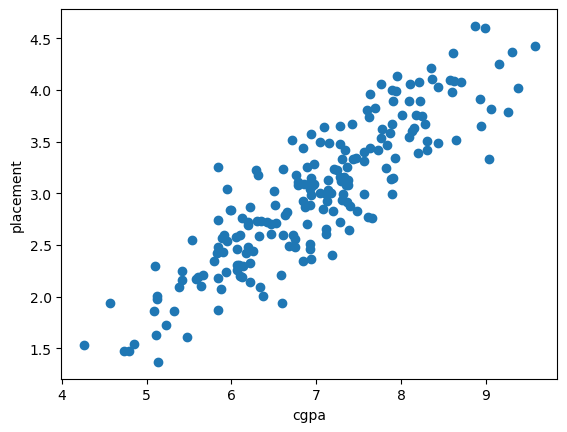

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('placement')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [16]:
lr.predict(X_test.iloc[0].values.reshape((1,1)))
# actually is 4.10

/home/satya-tt0492/anaconda3/envs/ex5/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'placement')

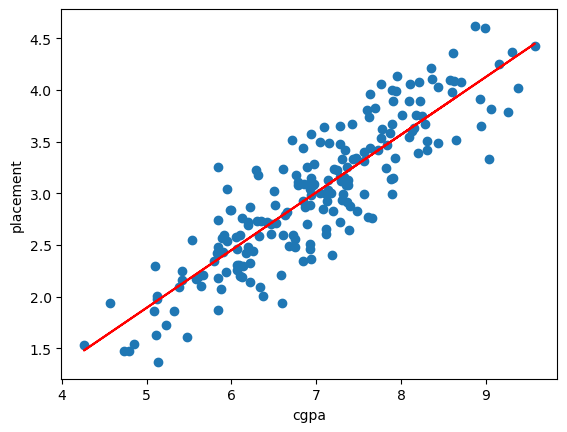

In [19]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('placement')

In [21]:
m = lr.coef_
b = lr.intercept_

In [22]:
# y = mx + b
m,b

(array([0.55795197]), -0.8961119222429144)

##### Internal Implementation
- OLS (LinearRegression uses)
- GD (SDGRegressor uses)

In [23]:
# OLS

In [100]:
# Handle single LR only, but sklearns can handle both, but we can improvise upon it
class MyLR:
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        X_mean = np.mean(X_train)
        Y_mean = np.mean(y_train)

        self.m = np.sum((y_train - Y_mean) * (X_train - X_mean)) / np.sum(np.square(X_train - X_mean))

        self.b = Y_mean - m * X_mean


    def predict(self, X_test):
        y_test = m * X_test + b
        return y_test

In [101]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [102]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [103]:
X.shape

(200,)

In [104]:
y.shape

(200,)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [106]:
mylr = MyLR()

In [107]:
mylr.fit(X_train,y_train)

In [108]:
mylr.predict(X_test[0])

array([3.89111601])

In [109]:
mylr.m, mylr.b

(0.557951973425072, array([-0.89611192]))

In [110]:
# this is same as what we got using the LinearRegression class of sklearn